In [1]:
# We will use the following packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_absolute_error, f1_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Data_Projects/ML-Project/pmx_gasoline_theft_prediction'

/content/drive/MyDrive/Data_Projects/ML-Project/pmx_gasoline_theft_prediction


In [5]:
# Importing our data

df_thefts_PMX = pd.read_excel("data/df_thefts_PMX_final_v2.xlsx", converters={'CVEGEO' : str})



In [6]:
social_variables = df_thefts_PMX.columns.drop(['Mun_code', 'Susceptible'])
social_variables

Index(['Pipe_intersec', 'Gas_stations', 'Gas_price', 'Confront_events', 'IRS',
       'Homic_rate', 'SBASC', 'POB_6_16_NEB', 'POB_16_EBI', 'NO_SS', 'OVPT',
       'NO_SANIT', 'OVSAE', 'NO_DREN', 'NO_ELECT', 'NO_LAVA', 'No_REFRI'],
      dtype='object')

In [7]:
#Fill 0s in Gas_prices NaN values

for key in social_variables:
  df_thefts_PMX[key] = df_thefts_PMX[key].fillna(0)

df_thefts_PMX.head()

,Mun_code,Pipe_intersec,Gas_stations,Gas_price,Confront_events,IRS,Homic_rate,Susceptible,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI
0,1001,22,1.35,17.78,0,-1.3456,5.41,1,1.887423,3.914694,23.463147,15.751315,0.558267,0.434323,0.539714,0.405613,0.185406,13.135097,4.976815
1,1002,3,21.29,17.93,0,-0.8732,4.13,0,4.053829,3.934379,38.616333,8.822640,1.593414,4.890338,1.171607,4.973795,0.997579,21.077503,13.729702
2,1004,5,76.76,17.85,0,-1.0391,6.20,0,3.835153,3.753315,30.835403,8.218243,1.335823,2.530502,0.671326,1.624260,0.697120,21.213440,11.657586
3,1005,5,18.80,17.84,0,-1.1825,4.83,0,2.887218,4.803344,30.812283,16.580066,1.043769,0.840948,0.911164,0.748003,0.439924,14.073904,6.988933
4,1006,8,31.76,17.83,0,-1.1859,4.26,1,3.120712,3.307964,28.773867,13.255280,0.696114,1.460176,1.117155,1.157367,0.667693,15.313592,8.822952


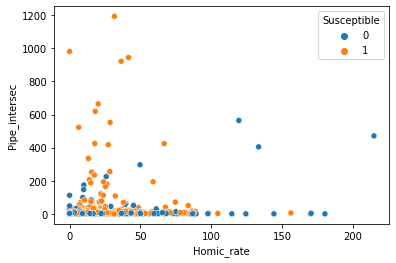

In [ ]:
# scatter plot using 

sns.scatterplot(x = "Homic_rate", 
                y = "Pipe_intersec", 
                hue = "Susceptible", data = df_thefts_PMX);

In [8]:
# We will now set data and target 
X = df_thefts_PMX.drop(columns=["Susceptible", 'Mun_code', 'Confront_events'])
y = df_thefts_PMX["Susceptible"]
X.columns

Index(['Pipe_intersec', 'Gas_stations', 'Gas_price', 'IRS', 'Homic_rate',
       'SBASC', 'POB_6_16_NEB', 'POB_16_EBI', 'NO_SS', 'OVPT', 'NO_SANIT',
       'OVSAE', 'NO_DREN', 'NO_ELECT', 'NO_LAVA', 'No_REFRI'],
      dtype='object')

In [35]:
y

0      1
1      0
2      0
3      0
4      1
      ..
834    0
835    1
836    0
837    0
838    0
Name: Susceptible, Length: 839, dtype: int64

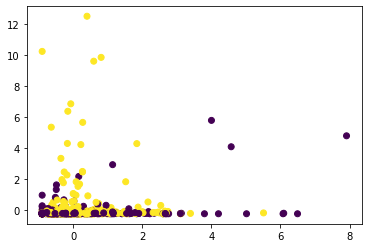

In [ ]:
# Preprocessing the data

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 6], X_new[:, 1], c=y);

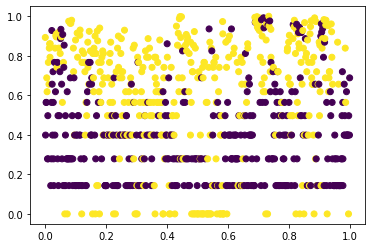

In [ ]:
# QuantileTransformer

from sklearn.preprocessing import QuantileTransformer

X_new2 = QuantileTransformer(n_quantiles = 500).fit_transform(X)
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y);

In [ ]:
#Checking the variables distribution - histogram

# Plot one histogram per variable

#for variable_name in df_thefts_PMX[['Pipe_intersec', 'Gas_stations', 'Gas_price',
#                                    'Confront_events', 'IRS', 'Homic_rate', 'SBASC', 'POB_6_16_NEB',
#                                    'POB_16_EBI', 'NO_SS', 'OVPT', 'NO_SANIT', 'OVSAE', 'NO_DREN',
#                                    'NO_ELECT', 'NO_LAVA', 'No_REFRI']]:
#                                   plt.figure()
#                                   # plot the histogram for each specie
#                                   df_thefts_PMX.groupby("Susceptible")[variable_name].plot.hist(alpha=0.5, legend=True)
#                                   plt.xlabel(variable_name)

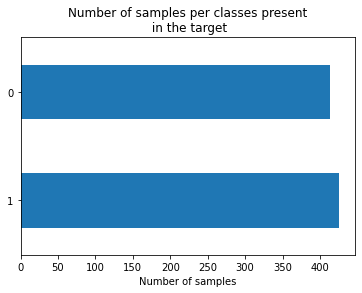

In [9]:
# Checking class balancing

import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

In [10]:
# Set up training and testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, stratify=y, test_size=0.2)

In [11]:
# 1. Logistic Regression Model
# 1.1 Preprocessing the data - Logistic Regression Model

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('model', LogisticRegression())
                 ])

#pipe.fit(X_train, y_train)
classifier = pipe.fit(X_train, y_train)





In [12]:
# 1.2 Here we predict using our unseen data (X_test)

target_predicted = pipe.predict(X_test)


In [13]:
# 1.3 Checking the accuracy

accuracy = accuracy_score(y_test, target_predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6131


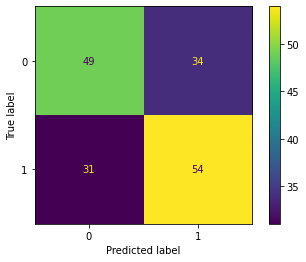

In [14]:
# 1.4 Checking the Confusion Matrix

_ = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) 

In [15]:
# 1.5 Some other metrics scores

precision = precision_score(y_test, target_predicted)
recall = recall_score(y_test, target_predicted)
# f1 score: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, target_predicted)


print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

Precision score: 0.6136
Recall score: 0.6353
F1 score: 0.6243


In [16]:
# 2. Decision Tree model
# 2.1 Preprocessing the data - Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)




DecisionTreeClassifier()

In [17]:
# 2.2 Here we predict using our unseen data (X_test)


target_predicted = classifier.predict(X_test)


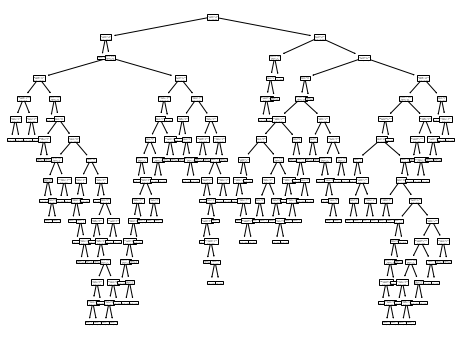

In [126]:
#Plotting the decision tree

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(classifier, feature_names=X.columns, impurity=False, ax=ax)


In [18]:
# 2.3 Checking the accuracy
import matplotlib.pyplot as plt

#plt.scatter(y_test, target_predicted)
#plt.show()



accuracy = accuracy_score(y_test, target_predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6726


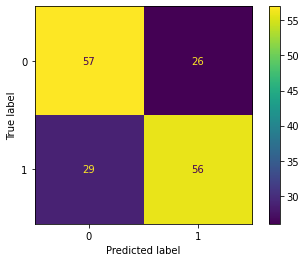

In [19]:
# 2.4 Checking the Confusion Matrix

_ = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) 

In [20]:
# 2.5 Some other metrics scores

precision = precision_score(y_test, target_predicted)
recall = recall_score(y_test, target_predicted)
# f1 score: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, target_predicted)


print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

Precision score: 0.6829
Recall score: 0.6588
F1 score: 0.6707


In [21]:
# 2.6 Some other metrics

from sklearn.metrics import classification_report
print(classification_report(y_test, target_predicted))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67        83
           1       0.68      0.66      0.67        85

    accuracy                           0.67       168
   macro avg       0.67      0.67      0.67       168
weighted avg       0.67      0.67      0.67       168



In [22]:
# 3. Random Forest model
# 3.1 Preprocessing the data

data = X_train
target = y_train

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier


categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)

random_forest = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=500, n_jobs=4, random_state=123)
)




In [23]:
# 3.2 Checking the accuracy with the trainning data

scores_random_forest = cross_val_score(random_forest, data, target)

print(f"Random forest classifier: "
      f"{scores_random_forest.mean():.3f} ± "
      f"{scores_random_forest.std():.3f}")


Random forest classifier: 0.763 ± 0.028


In [24]:
#3.3 Prepare to fit and predict with testing data


clf = RandomForestClassifier(n_estimators = 500, bootstrap = True, random_state = 123).fit(X_train, y_train)



In [25]:
# Create our predictions
prediction = clf.predict(X_test)



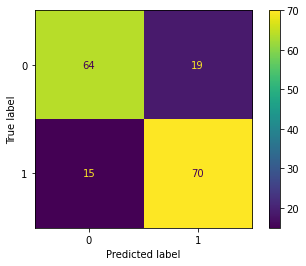

In [26]:


_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test) 

In [27]:
# Display accuracy score
accuracy_score(y_test, prediction)


0.7976190476190477

In [28]:
# 2.5 Some other metrics scores

precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
# f1 score: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)


print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

Precision score: 0.7865
Recall score: 0.8235
F1 score: 0.8046


In [29]:
# Let´s check the importate of each variable
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt

clf.feature_importances_

array([0.24666759, 0.06304405, 0.06401874, 0.03939958, 0.05418077,
       0.04209788, 0.04097167, 0.04582549, 0.06514726, 0.04525826,
       0.05143783, 0.03931586, 0.0481218 , 0.05635059, 0.05115681,
       0.04700582])

Text(0.5, 0, 'Random Forest Feature Importance')

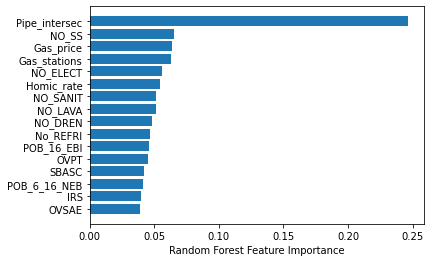

In [30]:
# Let´s check feature importance - Gini importance

sorted_idx = clf.feature_importances_.argsort()

plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Permutation Importance')

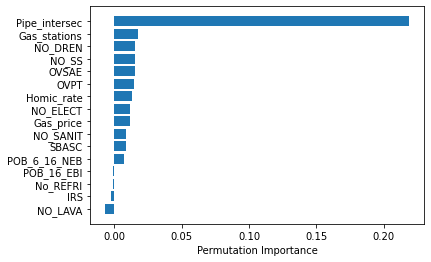

In [31]:
# Let´s check feature importance - Permutation Based Feature Importance 

perm_importance = permutation_importance(clf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [32]:
# Using grid search to find optimal hyperparameters for Random Forest model
#Credits: https://github.com/pacejohn/Random_Forest_Grid_Search/blob/master/rf_gridsearch_census.ipynb


import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [33]:
# Baseline: Random forest with default values.

# ************ Train/Test *********************
print("\n***************************************************************")
print("*****Random Forest With Default Hyperparameters Train/Test*****")
print("***************************************************************\n")

# ************ Train/Test *********************
# Create Random Forest Classifier using default hyperparameters
default_rf_clf = RandomForestClassifier(random_state=0)

# Train the Classifier
default_rf_clf.fit(X_train, y_train)

# Perform predictions
default_train_test_preds = default_rf_clf.predict(X_test)

# View the first 5 predictions and the predicted probabilities 
print("*****Default Hyperparameters Test Predictions*****")
for i in range(0,5):
	print("Prediction " + str(i+1) + " is " + str(default_train_test_preds[i]) + " with probabilities of " 
		+ str(default_rf_clf.predict_proba(X_test)[i]))

# Create confusion matrix
print("\n*****Default Hyperparameters Test Confusion Matrix*****")
confusion_matrix = pd.crosstab(y_test, default_train_test_preds, rownames=['Actual Income'], colnames=['Predicted Income'])
print(confusion_matrix)

# Print accuracy
default_accuracy = (((confusion_matrix[0][0] + confusion_matrix[1][1])) / (X_test.shape[0]) * 100)
print("\nDefault Hyperparameters Test Accuracy = {0:0.4f}%".format(default_accuracy))



***************************************************************
*****Random Forest With Default Hyperparameters Train/Test*****
***************************************************************

*****Default Hyperparameters Test Predictions*****
Prediction 1 is 0 with probabilities of [0.71 0.29]
Prediction 2 is 1 with probabilities of [0.33 0.67]
Prediction 3 is 0 with probabilities of [0.76 0.24]
Prediction 4 is 1 with probabilities of [0.36 0.64]
Prediction 5 is 1 with probabilities of [0.18 0.82]

*****Default Hyperparameters Test Confusion Matrix*****
Predicted Income   0   1
Actual Income           
0                 63  20
1                 14  71

Default Hyperparameters Test Accuracy = 79.7619%


In [160]:
# ************ Validation *********************
print("\n\n***************************************************************")
print("*****Random Forest With Default Hyperparameters Validation*****")
print("***************************************************************\n")


# ************ Random Forest Classifier using grid search for hyper-parameters ******************
print("\n\n***************************************************************")
print("*****************Random Forest Grid Search*********************")
print("***************************************************************\n")

# Number of trees in random forest
# Using num=2 will significantly reduce run time (~3 min vs ~65 min)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]
# Using num=10 will significantly increase run time
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# Using num=2 will significantly reduce run time (~3 min vs ~65 min)
max_depth = [int(x) for x in np.linspace(10, 110, num = 2)]
# Using num=10 will significantly increase run time
#max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("The values that will be used for the grid search are:")
pprint(grid)

print("\n*****Performing the Grid Search of the Hyperparameters*****")
# Create a regressor using values from grid
rf_reg = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_reg, param_grid = grid, cv = 3, n_jobs = -1, verbose = 1)

# Train the classifier
best_grid = grid_search.fit(X_train, y_train)

# Make predictions
grid_preds = best_grid.predict(X_test)

print("The best hyperparameters found during the grid search are:")
pprint(best_grid.best_params_)



***************************************************************
*****Random Forest With Default Hyperparameters Validation*****
***************************************************************



***************************************************************
*****************Random Forest Grid Search*********************
***************************************************************

The values that will be used for the grid search are:
{'bootstrap': [True, False],
 'max_depth': [10, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 2000]}

*****Performing the Grid Search of the Hyperparameters*****
Fitting 3 folds for each of 216 candidates, totalling 648 fits
The best hyperparameters found during the grid search are:
{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}


In [161]:
# ************ Random Forest Classifier using grid search with best hyper-parameters ******************
print("\n************************************************************************")
print("*****Random Forest With Hyperparameters from Grid Search Train/Test*****")
print("************************************************************************\n")

# Train the Classifier with new values from grid search
rf_clf = RandomForestClassifier(max_depth = best_grid.best_params_["max_depth"], 
	min_samples_split = best_grid.best_params_["min_samples_split"], 
	min_samples_leaf = best_grid.best_params_["min_samples_leaf"], 
	bootstrap = best_grid.best_params_["bootstrap"], 
	max_features = best_grid.best_params_["max_features"], 
	n_estimators = best_grid.best_params_["n_estimators"], n_jobs=-1, random_state=0)
rf_clf.fit(X_train, y_train)

# Perform predictions
train_test_preds = rf_clf.predict(X_test)

# View the first 5 predictions and the predicted probabilities 
print("\n")
print("*****Grid Search Hyperparameters Test Predictions*****")
for i in range(0,5):
	print("Prediction " + str(i+1) + " is " + str(train_test_preds[i]) + " with probabilities of " + str(rf_clf.predict_proba(X_test)[i]))

# Create confusion matrix
print("\n*****Grid Search Hyperparameters Test Confusion Matrix*****")
confusion_matrix = pd.crosstab(y_test, train_test_preds, rownames=['Actual Income'], colnames=['Predicted Income'])
print(confusion_matrix)

# Print accuracy
grid_search_accuracy = (((confusion_matrix[0][0] + confusion_matrix[1][1])) / (X_test.shape[0]) * 100)
print("\nGrid Search Hyperparameters Test Accuracy = {0:0.4f}%".format(grid_search_accuracy))

print("\nCompared to the random forest classifier created with default hyperparameters, the accuracy of the " +
	"classifier created with optimal hyperparameters determined by grid search is " +
	"{0:0.4f}% better".format((grid_search_accuracy - default_accuracy)))


************************************************************************
*****Random Forest With Hyperparameters from Grid Search Train/Test*****
************************************************************************



*****Grid Search Hyperparameters Test Predictions*****
Prediction 1 is 1 with probabilities of [0.34160723 0.65839277]
Prediction 2 is 1 with probabilities of [0.47385708 0.52614292]
Prediction 3 is 0 with probabilities of [0.89026795 0.10973205]
Prediction 4 is 0 with probabilities of [0.642878 0.357122]
Prediction 5 is 0 with probabilities of [0.73352716 0.26647284]

*****Grid Search Hyperparameters Test Confusion Matrix*****
Predicted Income   0   1
Actual Income           
0                 30  11
1                  8  35

Grid Search Hyperparameters Test Accuracy = 77.3810%

Compared to the random forest classifier created with default hyperparameters, the accuracy of the classifier created with optimal hyperparameters determined by grid search is 0.0000% better

In [143]:
#Importing libraries
#Font: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f


import pandas as pd
#from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500))

In [144]:
#To see which features are important we can use get_support method on the fitted model.

sel.get_support()

array([ True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False])

In [145]:
#We can now make a list and count the selected features.

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [146]:
#To get the name of the features selected

print(selected_feat)

Index(['Pipe_intersec', 'Gas_stations', 'Gas_price', 'NO_SS'], dtype='object')
